In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
z, sigma_z, m, sigma_m, A_E, KBB, Delta, sigmaB=np.loadtxt('/Users/Peter/Desktop/Python-Kurs/Supernovae1.txt', skiprows=3, usecols=(1,2,3,4,5,6,7,8), unpack=True)

In [7]:
mBeff=m+Delta-KBB-A_E

In [11]:
dlogz=sigma_z/(z*np.log(10))

<Container object of 3 artists>

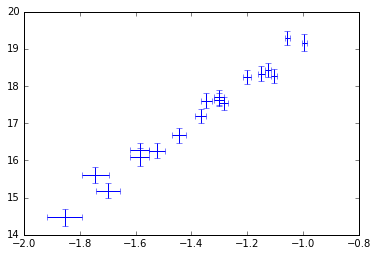

In [12]:
plt.errorbar(np.log10(z),mBeff, xerr=dlogz, yerr=sigmaB, linestyle='None')

In [13]:
z2, sigma_z2, m2, sigma_m2, A_E2, KBB2, Delta2, sigmaB2=np.loadtxt('/Users/Peter/Desktop/Python-Kurs/Supernovae2.txt', skiprows=3, usecols=(1,2,3,4,5,6,7,8), unpack=True)

In [14]:
mBeff2=m2+Delta2-KBB2-A_E2

In [20]:
dlogz2=sigma_z2/(z2*np.log(10))

<function matplotlib.pyplot.winter>

<Container object of 3 artists>

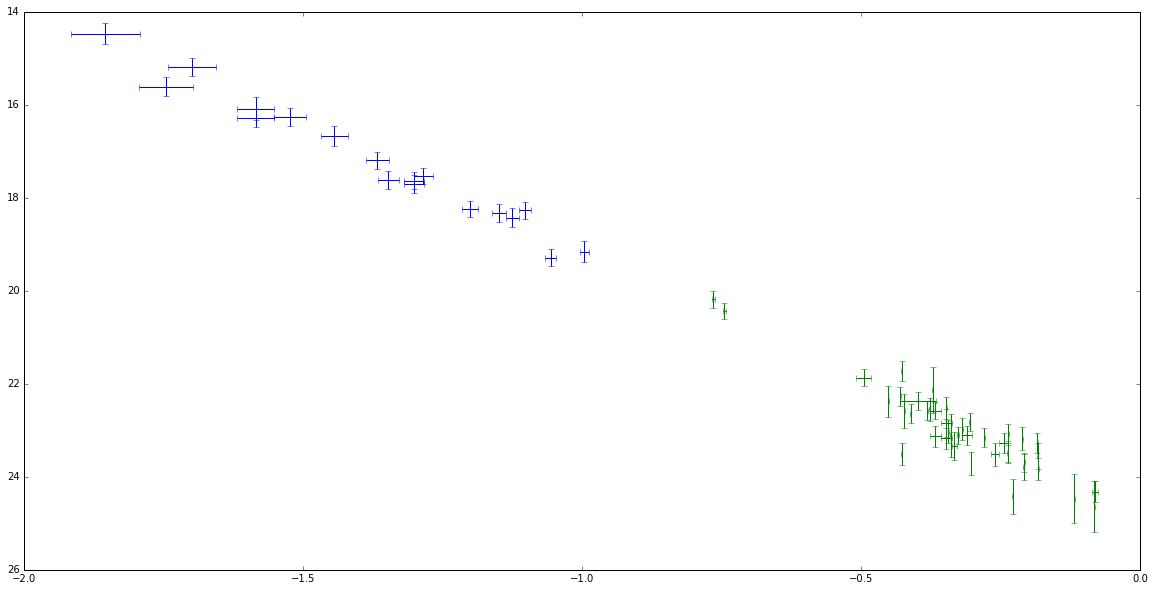

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.gca().invert_yaxis()
ax.errorbar(np.log10(z),mBeff, xerr=dlogz, yerr=sigmaB, linestyle='None')
ax.errorbar(np.log10(z2),mBeff2, xerr=dlogz2, yerr=sigmaB2, linestyle='None')

[ 24.06930094] [[ 0.00294316]]


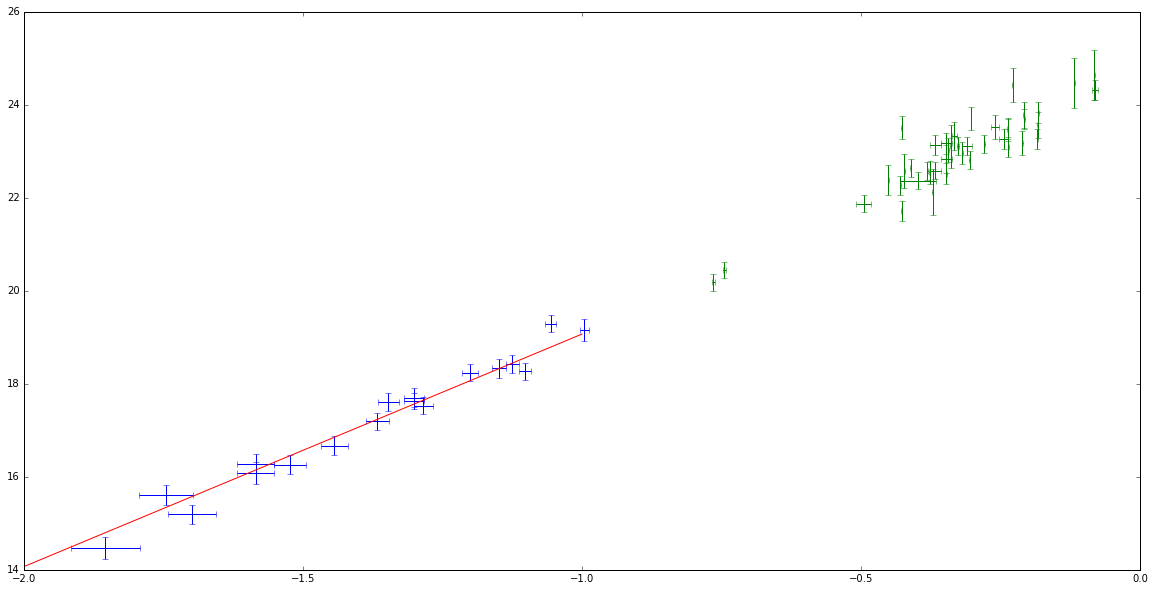

In [45]:
logz=np.log10(z)
def linear(x,b):
    return 5*x+b
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
popt,pcov=curve_fit(linear,logz, mBeff)
print(popt, pcov)
ax.errorbar(np.log10(z),mBeff, xerr=dlogz, yerr=sigmaB, linestyle='None')
ax.errorbar(np.log10(z2),mBeff2, xerr=dlogz2, yerr=sigmaB2, linestyle='None')
ax.plot(np.linspace(-2,-1,50), linear(np.linspace(-2,-1,50),*popt))

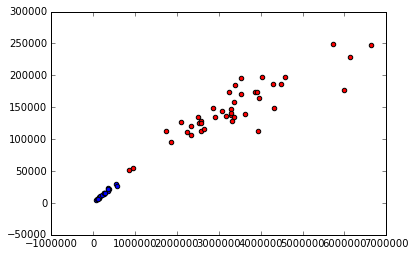

In [56]:
DM=mBeff+19.47
d=10**((DM+5)/5)*10**(-3)
plt.scatter(d,3*10**5*z)
DM2=mBeff2+19.47
d2=10**((DM2+5)/5)*10**(-3)
plt.scatter(d2,3*10**5*z2, c='r')

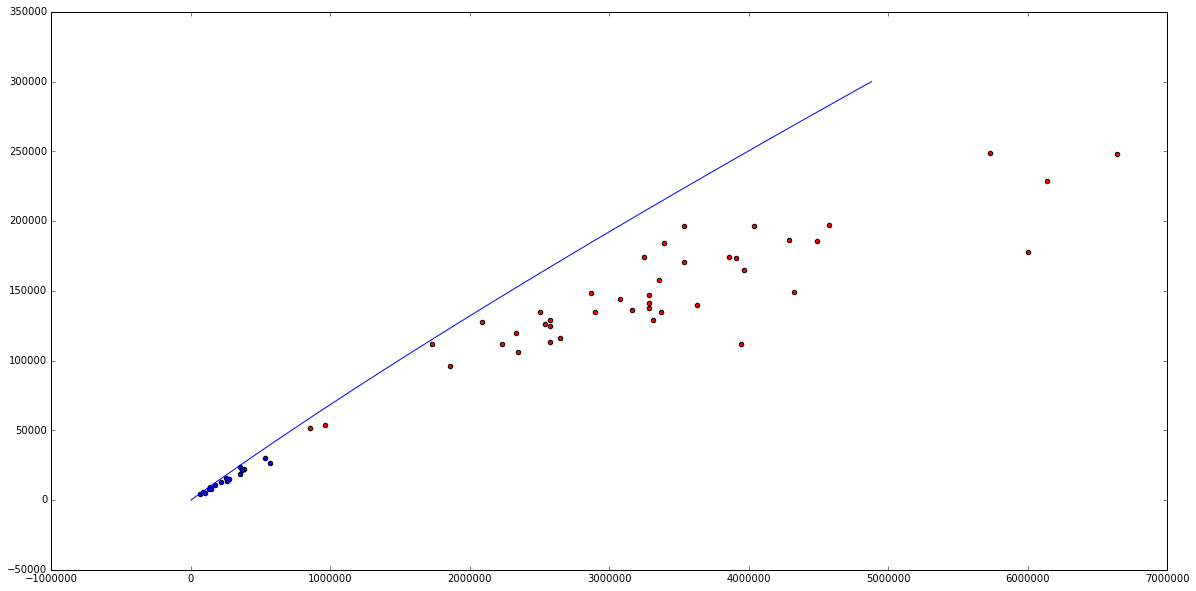

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
DM=mBeff+19.47
d=10**((DM+5)/5)*10**(-3)
ax.scatter(d,3*10**5*z)
DM2=mBeff2+19.47
d2=10**((DM2+5)/5)*10**(-3)
ax.scatter(d2,3*10**5*z2, c='r')

x=np.linspace(0,1,100)
dl=8.33*(1+x-np.sqrt(1+x))*10**6

ax.plot(dl,3*10**(5)*x)